# LIFE EXPECTANCY PREDICTION

## Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import sklearn as sk
pd.set_option('display.max_columns', 30)

## Data

In [2]:
df1 = pd.read_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/Life Expectancy Data.csv')
df2 = pd.read_excel('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/Country-Metadata.xlsx')
df3 = pd.read_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_original/PopData.csv')

## Basic EDA and Cleaning

In [4]:
%%capture
df1.info()

> There is a lot of missingness

In [6]:
df1.columns.nunique()

22

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       197 non-null    object
 1   CountryCode   197 non-null    object
 2   Region        197 non-null    object
 3   IncomeGroup   197 non-null    object
 4   SpecialNotes  128 non-null    object
dtypes: object(5)
memory usage: 7.8+ KB


In [38]:
df2.head()

,Country,CountryCode,Region,IncomeGroup,SpecialNotes
0,Aruba,ABW,Latin America & Caribbean,High income: nonOECD,SNA data for 2000-2011 are updated from offici...
1,Afghanistan,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...
2,Angola,AGO,Sub-Saharan Africa,Upper middle income,"April 2013 database update: Based on IMF data,..."
3,Albania,ALB,Europe & Central Asia,Upper middle income,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,NaN


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      177 non-null    object
 1   CountryCode  177 non-null    object
 2   2000         177 non-null    int64 
 3   2001         177 non-null    int64 
 4   2002         177 non-null    int64 
 5   2003         177 non-null    int64 
 6   2004         177 non-null    int64 
 7   2005         177 non-null    int64 
 8   2006         177 non-null    int64 
 9   2007         177 non-null    int64 
 10  2008         177 non-null    int64 
 11  2009         177 non-null    int64 
 12  2010         177 non-null    int64 
 13  2011         177 non-null    int64 
 14  2012         177 non-null    int64 
 15  2013         177 non-null    int64 
 16  2014         177 non-null    int64 
 17  2015         177 non-null    int64 
dtypes: int64(16), object(2)
memory usage: 25.0+ KB


> Our data has some missing values, I will use missingmno to visualize it

## Handling missingness

### 1. Life Expectancy df

- I use the missingno library to visualize missing data throughout my columns

#### a. Missing matrix

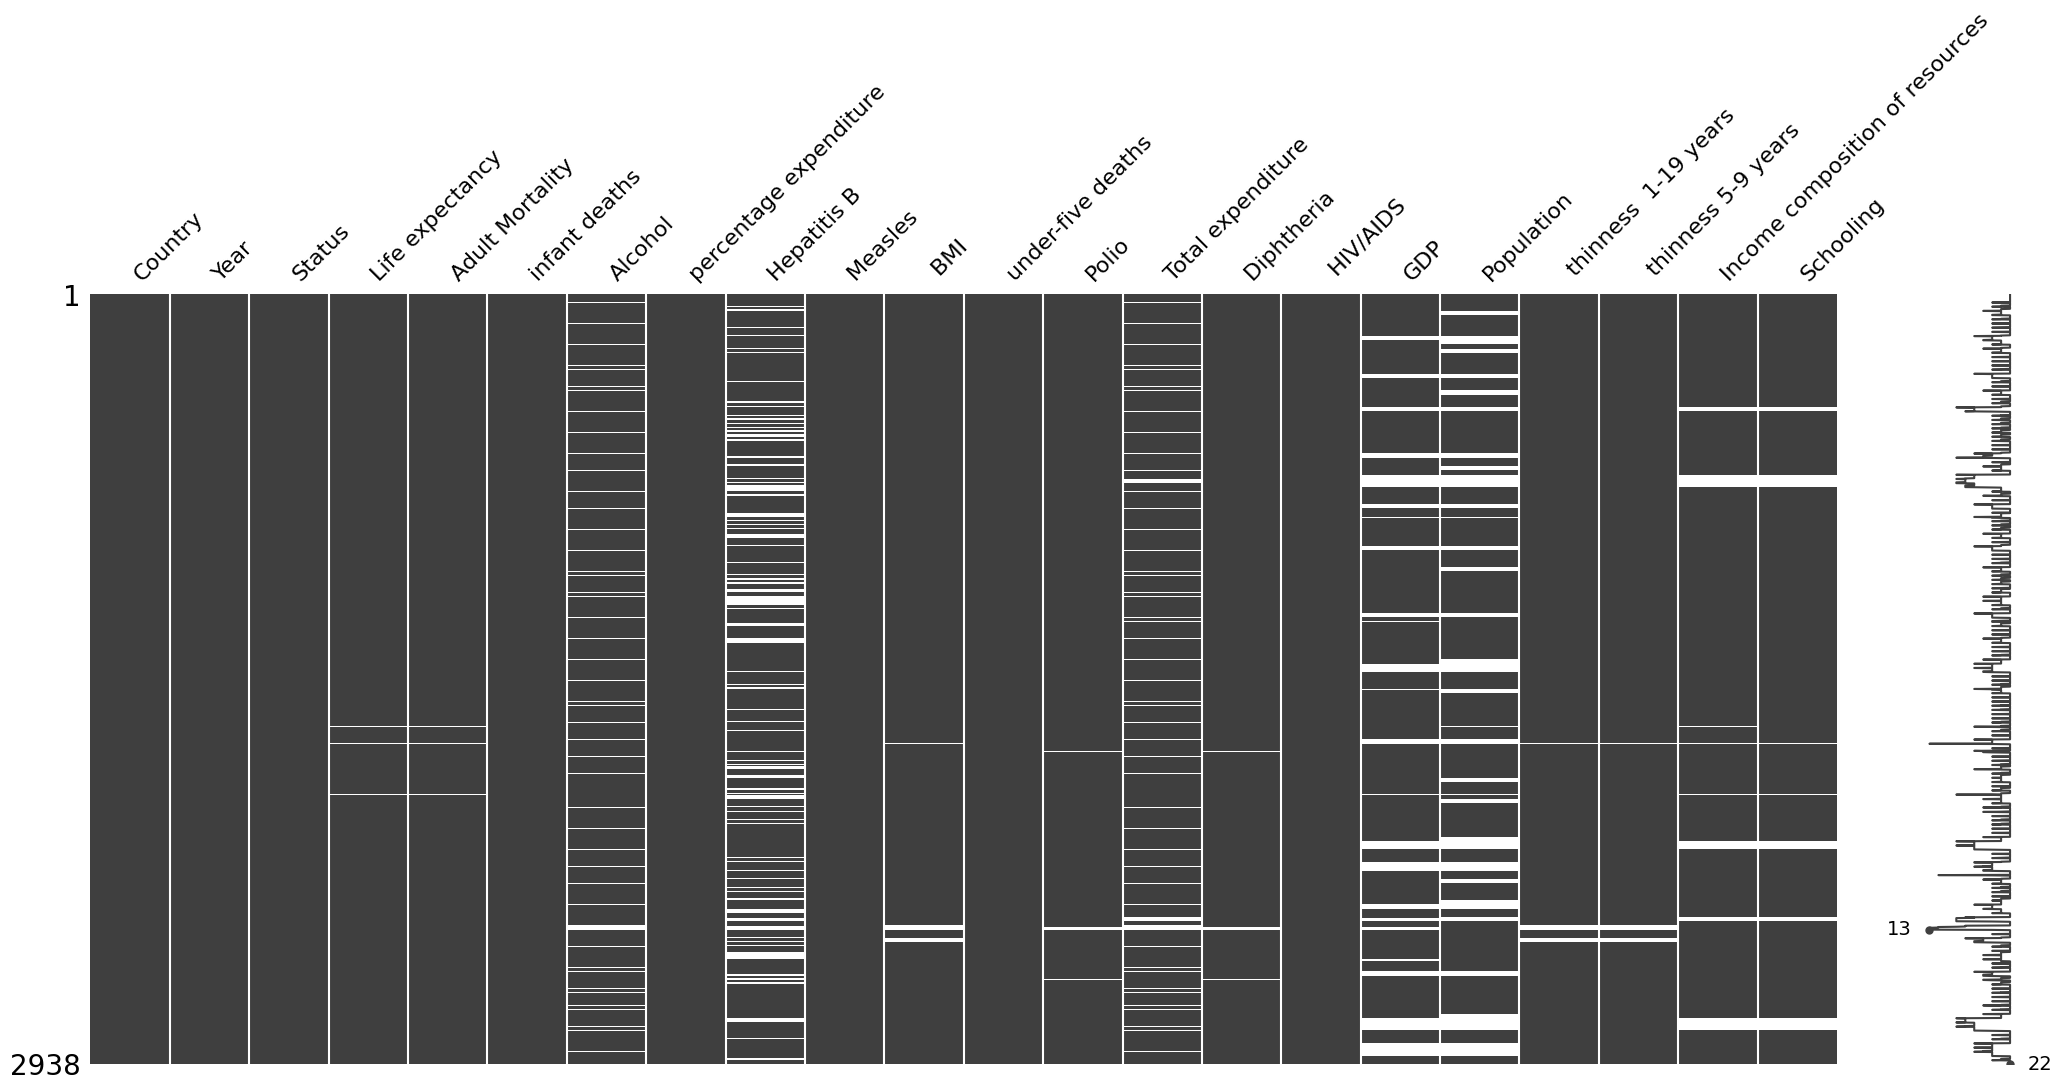

In [7]:
msno.matrix(df1)
plt.show()

> - Life expectancy and Adult Mortality might be Missing Not At Random (MNAR)
> - Alcohol MCAR
> - Hepatitis B - MCAR
> - BMI and Polio - MAR
> - Polio and diptheris - MNAR
> - Total Expenditure - MCAR
> - GDP and POpulation - MNAR
> - Thinness 1-19 and 5-9 years - MNAR
> - Income composition of resources and Schooling

### b. Missingno Heatmap

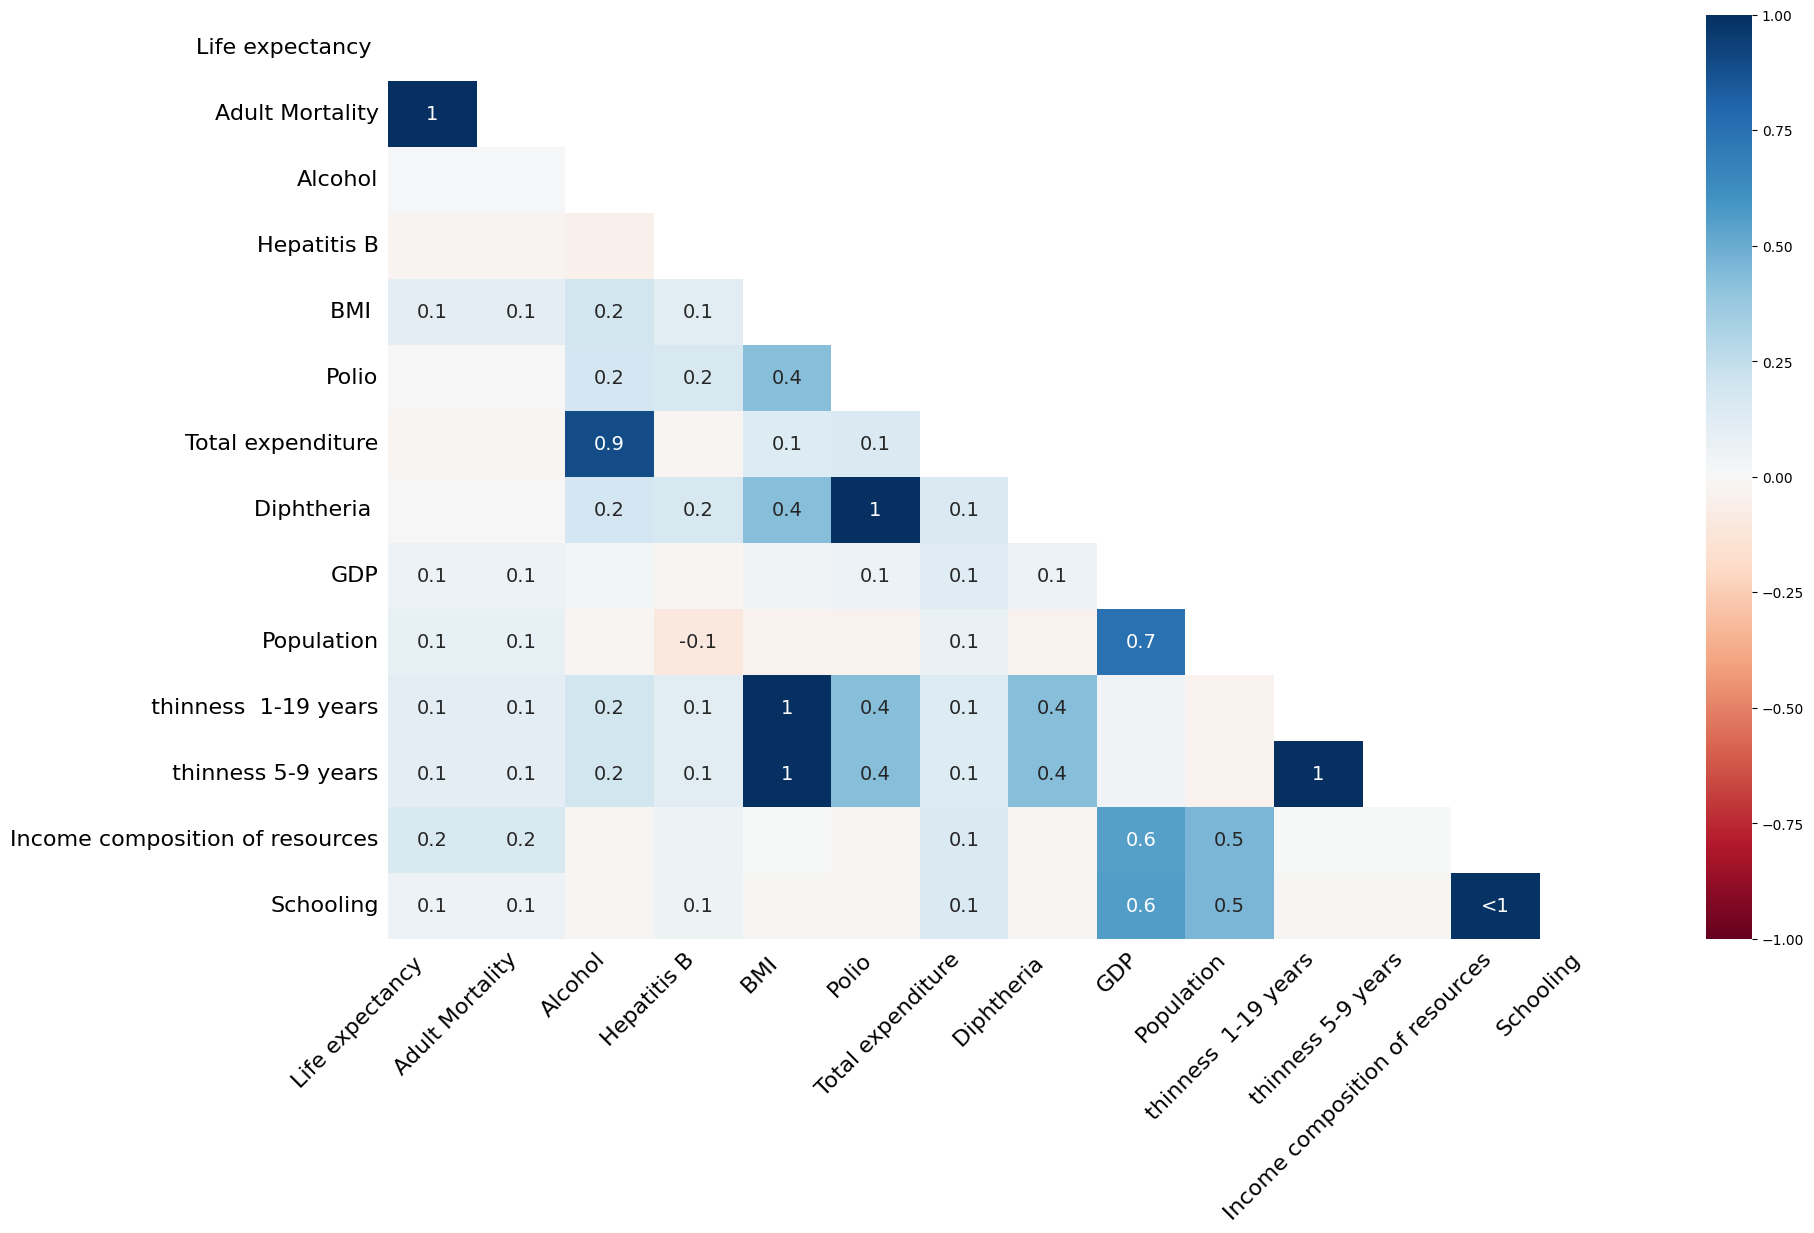

In [8]:
msno.heatmap(df1)
plt.show()

> - Total Expenditure and alcohol
> - Adult Mortality and Life Expectancy
> - Diptheria and Polio
> - Thinness 1-19 and 5-9 years
> - GDP and schooling
> - GDP and income composition of resources

- From this data there is apparent correlation in missingness between the different columns
- Meaning, I have to take into consideration other columns while imputing the missing data

### c. Dendrogram

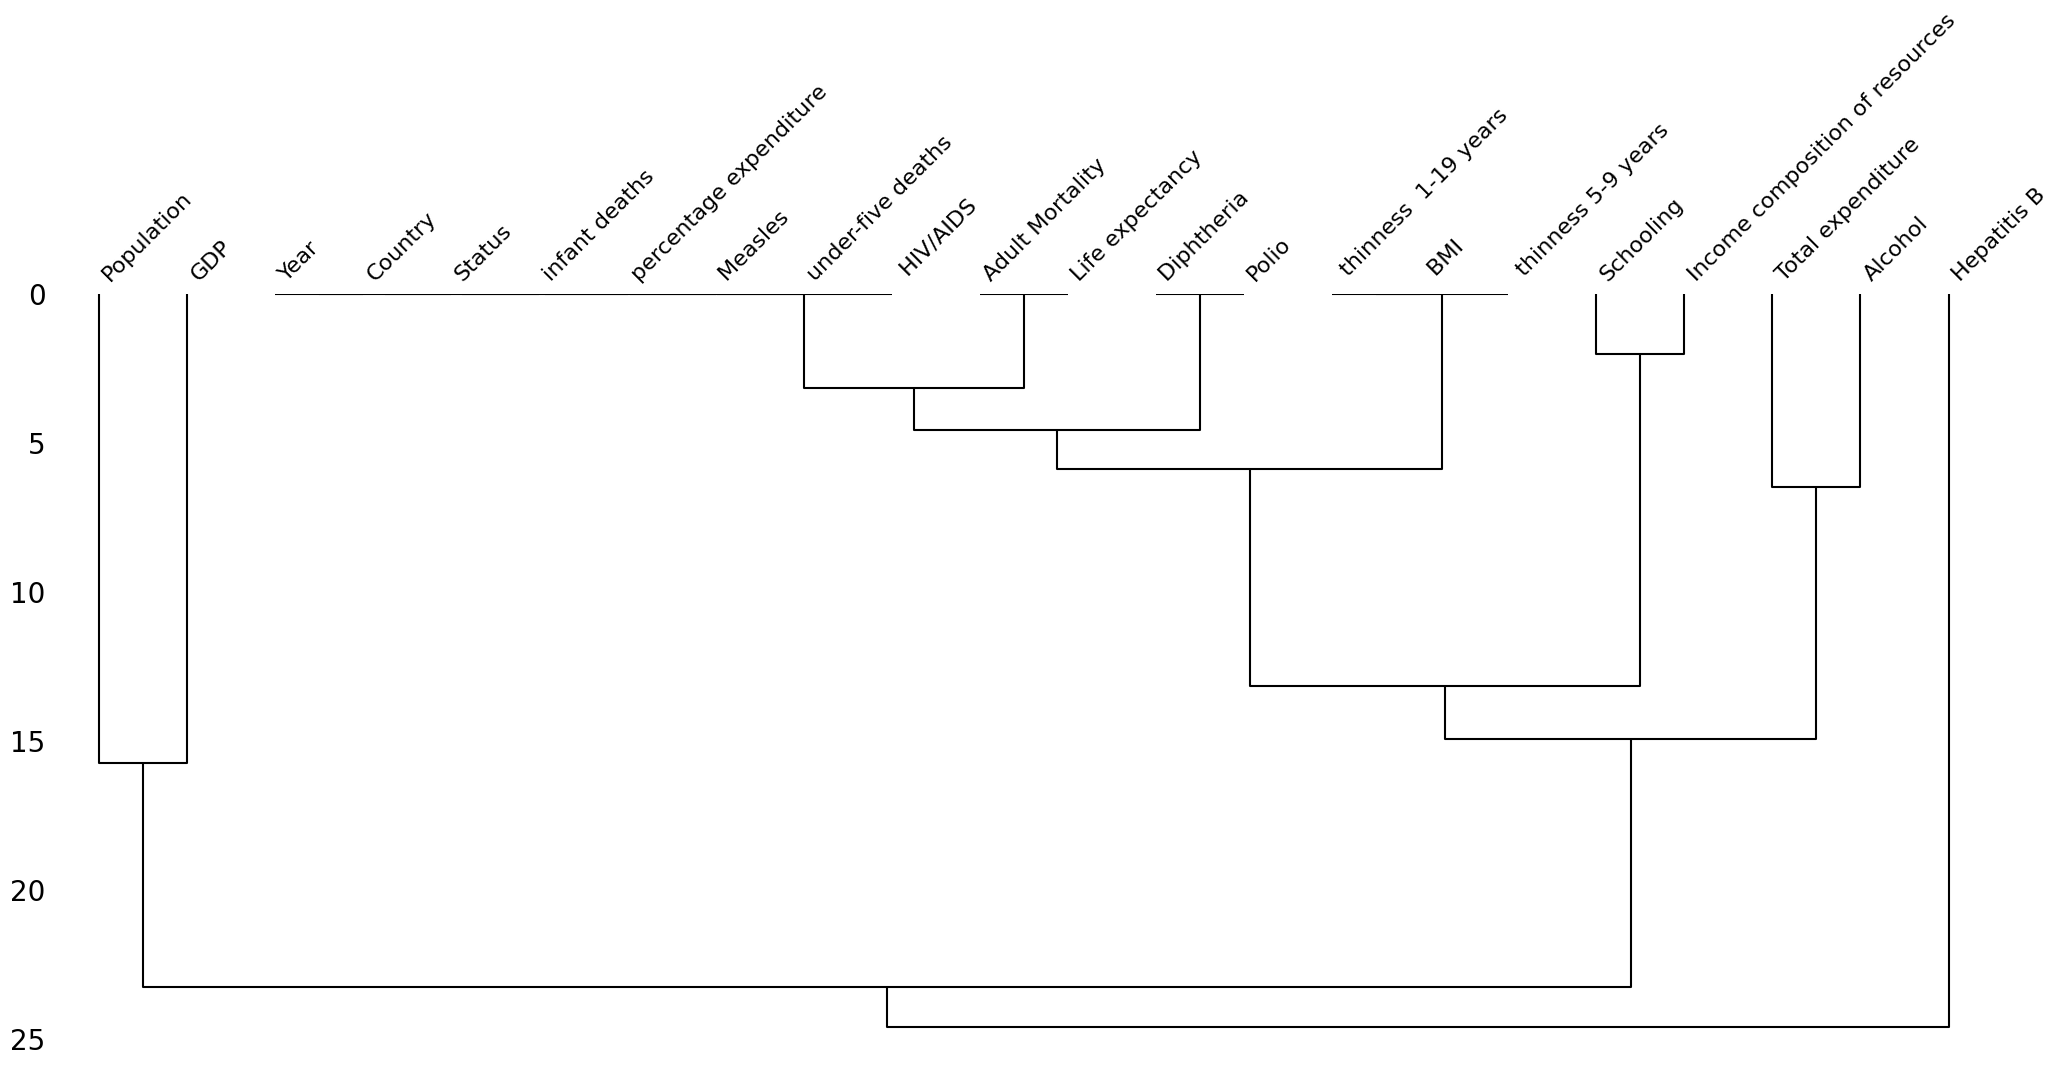

In [9]:
msno.dendrogram(df1)
plt.show()

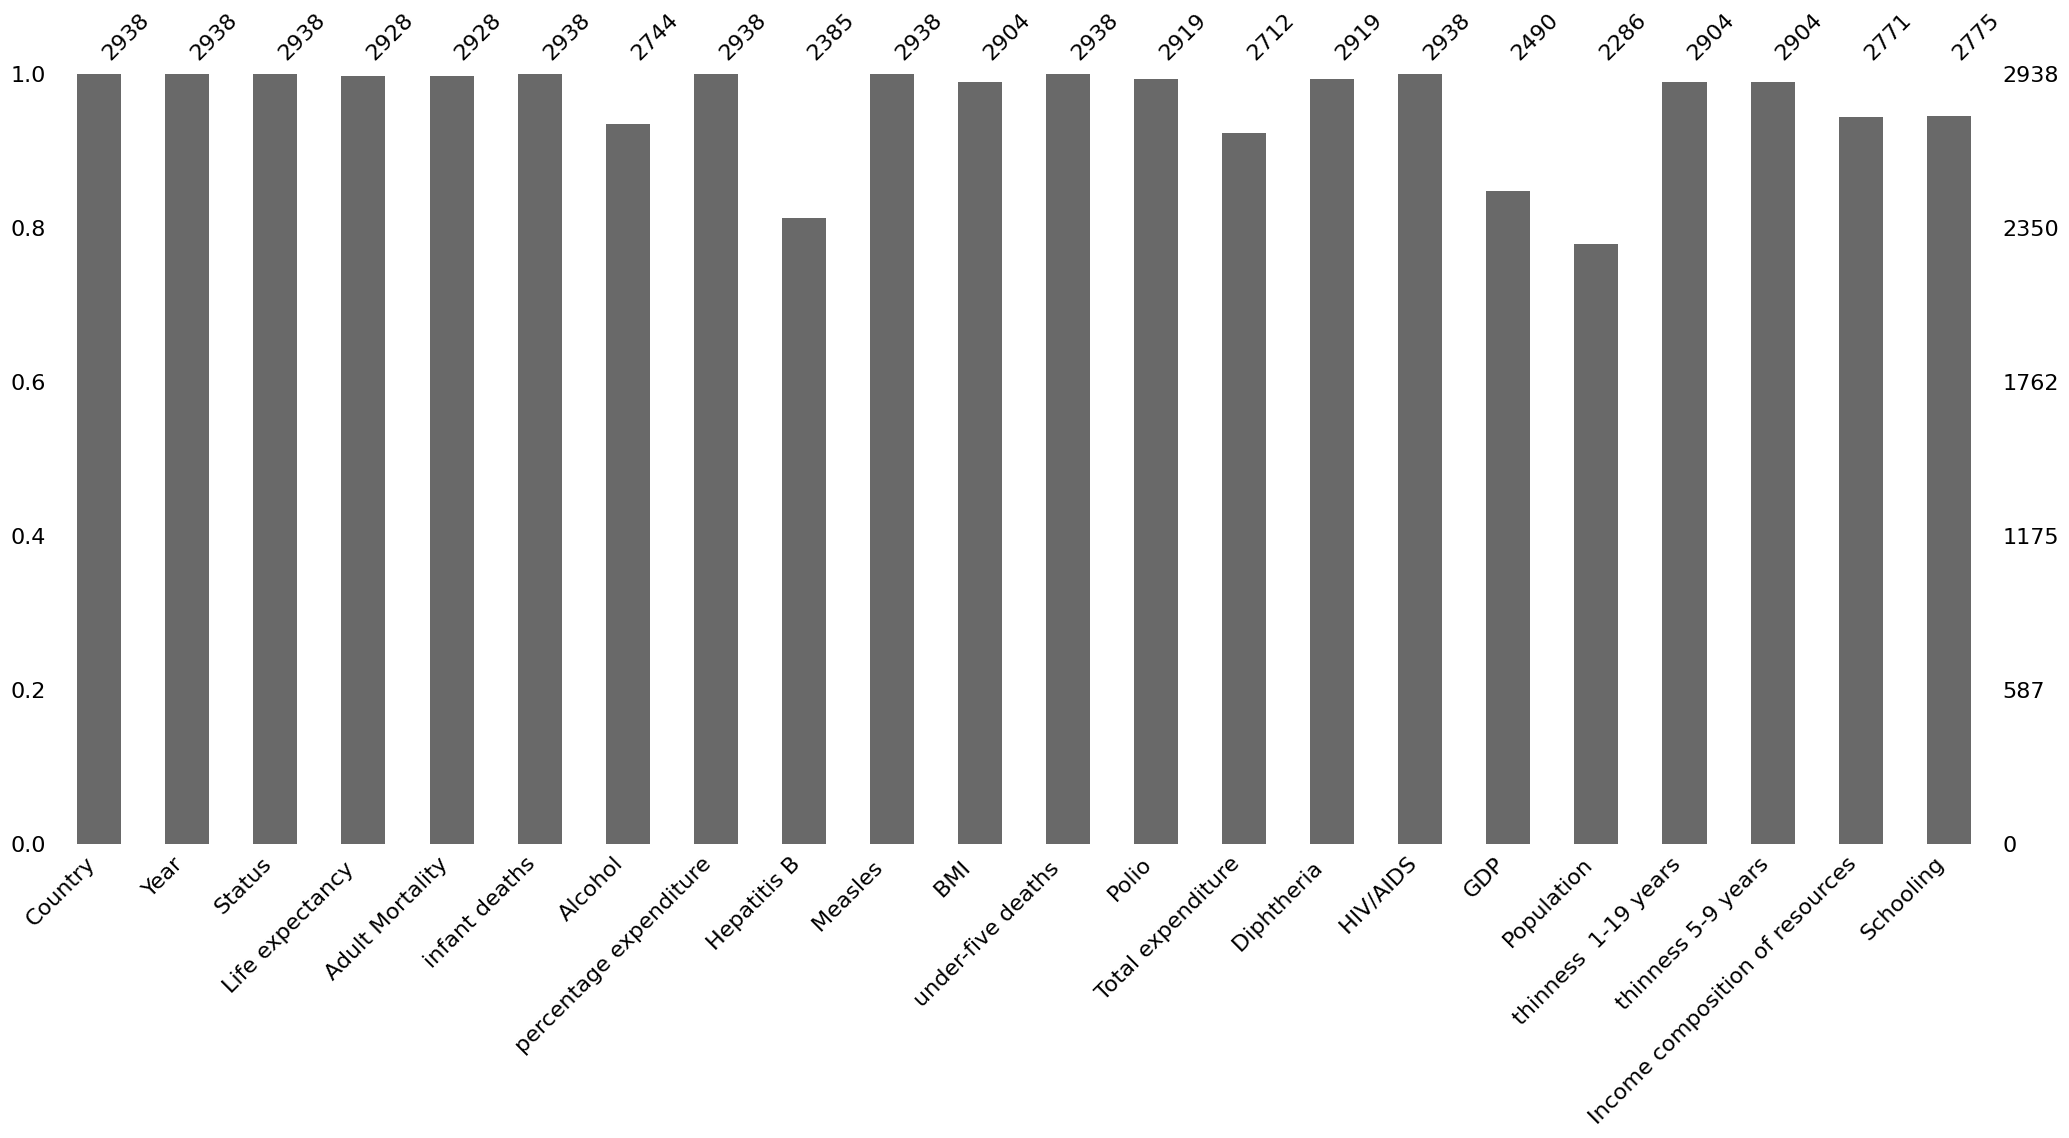

In [10]:
msno.bar(df1)
plt.show()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Imputation

Mulitple Imputation by Chained Equations (MICE)

In [12]:
from miceforest import ImputationKernel

In [13]:
mice_kernel = ImputationKernel(
    data = df1.drop(columns=['Country','Status']),
    save_all_iterations_data=True,
    random_state=42
)

In [14]:
mice_kernel.mice(5)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
mice_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2938 non-null   float64
 2   Adult Mortality                  2938 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2938 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2938 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2938 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2938 non-null   float64
 11  Total expenditure                2938 non-null   float64
 12  Diphtheria          

In [16]:
final_df = pd.concat([df1[['Country', 'Status']], mice_imputation], axis=1)


In [17]:
final_df.head()

,Country,Status,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Status                           2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## Visualising Imputed vs the Original Data

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [20]:
missing_cols = df1.columns[df1.isnull().any()]
print(missing_cols)


Index(['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


## Visualise missing data

In [21]:
cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B',
       ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [22]:
def kde_plt_grid(df, cols, rows=4, cols_per_row=4,figsize=(10,8)):
    fig, ax = plt.subplots(rows, cols_per_row, figsize=figsize)
    ax = ax.flatten()

    for i,col in enumerate (cols): 
        if i<len(ax):
            sns.kdeplot (df[col], fill=True, ax=ax[i])
            ax[i].set_title(col)

    for j in range(i+1, len(ax)):
        fig.delaxes(ax[j])
        
    plt.tight_layout()
    plt.show()

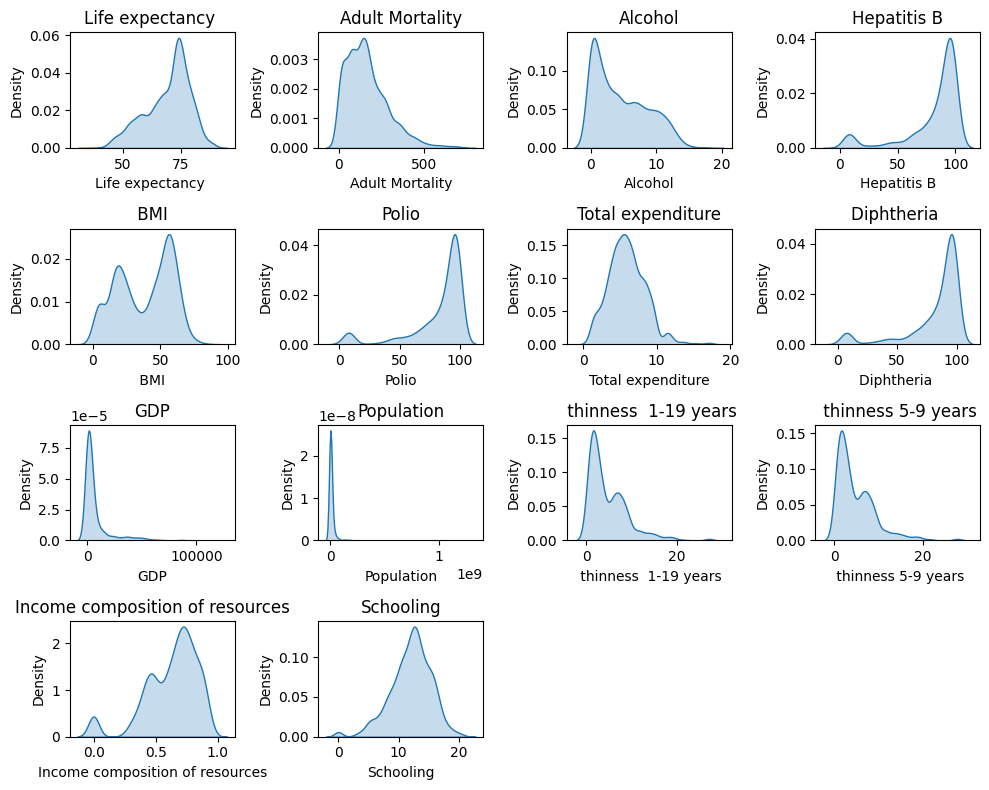

In [23]:
kde_plt_grid(df1, cols)

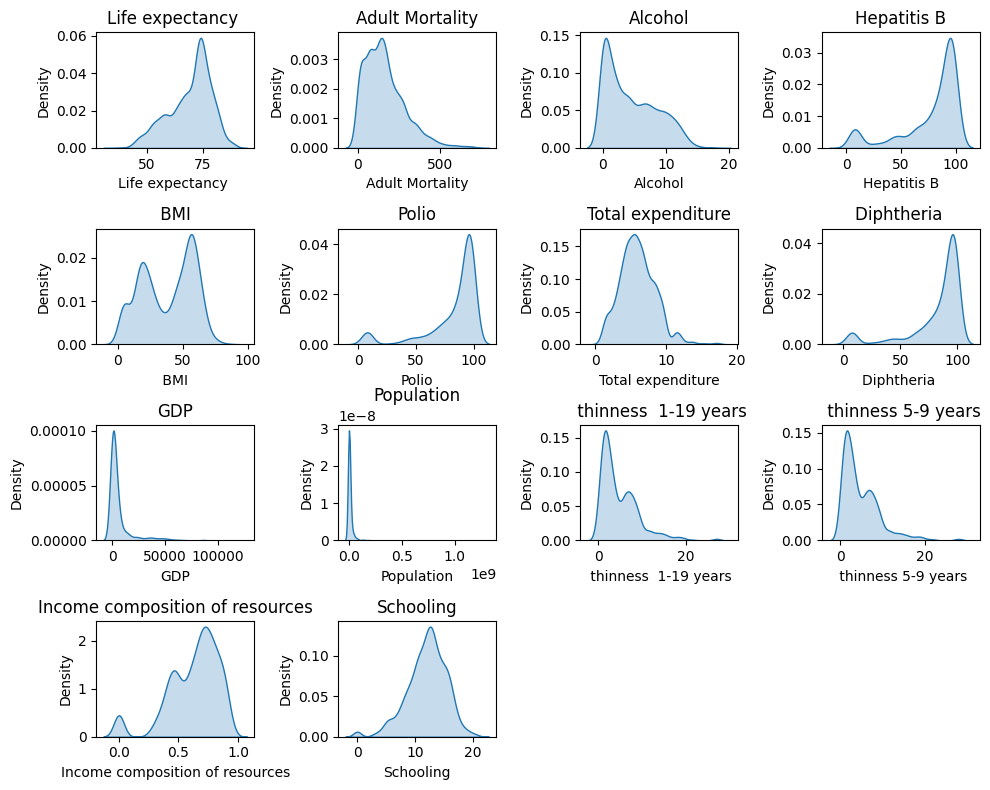

In [24]:
kde_plt_grid(final_df, cols)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_kde_imputation(original_df, imputed_df, cols, rows=4, cols_per_row=4, figsize=(10, 8)):
    """
    Plots KDE distributions of original vs. imputed data to evaluate imputation quality.

    Parameters:
    - original_df: DataFrame before imputation
    - imputed_df: DataFrame after imputation
    - cols: List of column names to compare
    - rows: Number of rows in the subplot grid (default: 4)
    - cols_per_row: Number of columns in the subplot grid (default: 4)
    - figsize: Tuple specifying figure size (default: (10, 8))
    """
    fig, ax = plt.subplots(rows, cols_per_row, figsize=figsize)
    ax = ax.flatten()  # Flatten for easy iteration

    for i, col in enumerate(cols):
        if i < len(ax):
            sns.kdeplot(original_df[col].dropna(), fill=True, ax=ax[i], label="Original", color='blue')
            sns.kdeplot(imputed_df[col], fill=True, ax=ax[i], label="Imputed", color='red', linestyle="dashed")
            ax[i].set_title(col)
            ax[i].legend()

    # Hide unused subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()


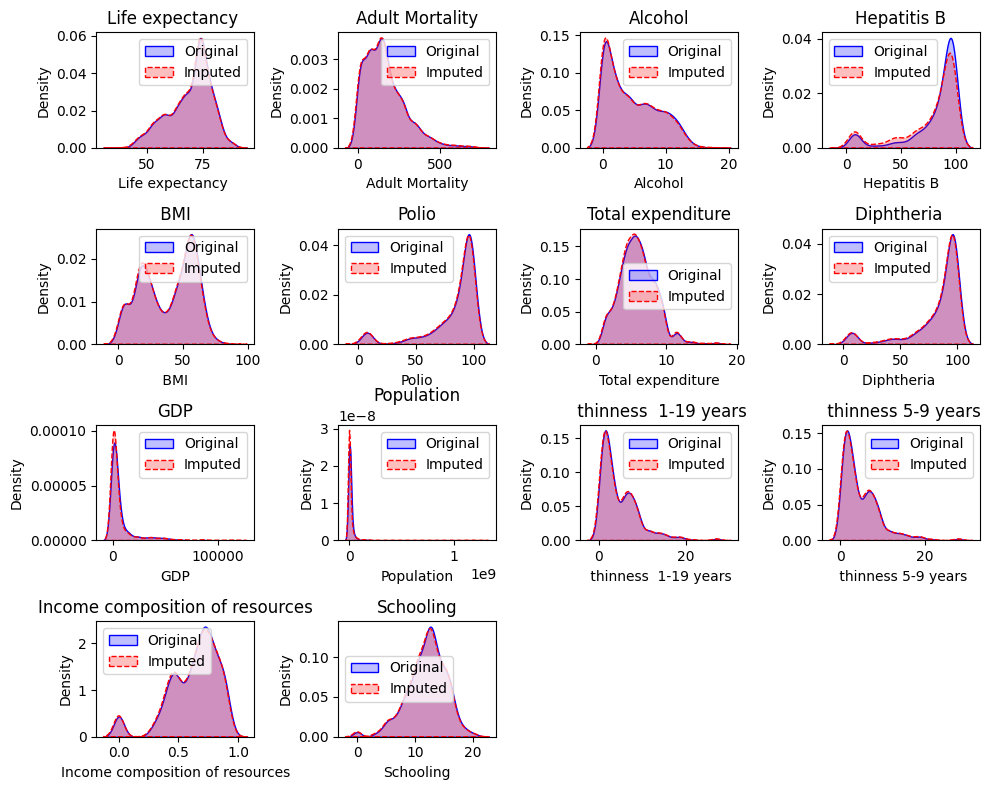

In [26]:
compare_kde_imputation(df1, final_df, cols)

In [27]:
df1[cols].describe()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2744.000000,2385.000000,2904.000000,2919.000000,2712.00000,2919.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,4.602861,80.940461,38.321247,82.550188,5.93819,82.324084,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,4.052413,25.070016,20.044034,23.428046,2.49832,23.716912,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.010000,1.000000,1.000000,3.000000,0.37000,2.000000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.877500,77.000000,19.300000,78.000000,4.26000,78.000000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.755000,92.000000,43.500000,93.000000,5.75500,93.000000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,7.702500,97.000000,56.200000,97.000000,7.49250,97.000000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,17.870000,99.000000,87.300000,99.000000,17.60000,99.000000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [28]:
final_df[cols].describe()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.234683,164.521443,4.529374,77.006807,38.123077,82.327774,5.932366,82.190946,6617.335485,1.198073e+07,4.847379,4.878931,0.625204,11.972566
std,9.511540,124.222086,4.023418,27.232988,20.025359,23.641398,2.489727,23.799725,13332.302087,5.461142e+07,4.401800,4.492269,0.212448,3.362446
min,36.300000,1.000000,0.010000,1.000000,1.000000,3.000000,0.370000,2.000000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.830000,68.000000,19.200000,77.000000,4.270000,78.000000,436.516301,1.997120e+05,1.600000,1.600000,0.491000,10.100000
50%,72.100000,144.000000,3.640000,89.000000,43.000000,93.000000,5.720000,93.000000,1560.009133,1.334652e+06,3.400000,3.400000,0.675000,12.300000
75%,75.675000,227.000000,7.597500,96.000000,56.100000,97.000000,7.470000,97.000000,5216.747052,7.229619e+06,7.200000,7.200000,0.780000,14.300000
max,89.000000,723.000000,17.870000,99.000000,87.300000,99.000000,17.600000,99.000000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## Kolmogorov-Smirnov (KS) Test

- Compares cumulative distributions of two datasets
- Null hypothesis (H₀): The two distributions are the same
- If p-value < 0.05, imputation significantly changed the distribution

In [29]:
from scipy.stats import ks_2samp

for col in cols:
    stat, p_value = ks_2samp(df1[col].dropna(), final_df[col])
    print(f"{col}: KS Test p-value = {p_value:.4f}")


Life expectancy : KS Test p-value = 1.0000
Adult Mortality: KS Test p-value = 1.0000
Alcohol: KS Test p-value = 1.0000
Hepatitis B: KS Test p-value = 0.0000
 BMI : KS Test p-value = 1.0000
Polio: KS Test p-value = 1.0000
Total expenditure: KS Test p-value = 1.0000
Diphtheria : KS Test p-value = 1.0000
GDP: KS Test p-value = 0.0712
Population: KS Test p-value = 0.9886
 thinness  1-19 years: KS Test p-value = 1.0000
 thinness 5-9 years: KS Test p-value = 1.0000
Income composition of resources: KS Test p-value = 1.0000
Schooling: KS Test p-value = 1.0000


> p > 0.05 → No significant difference (good imputation)  
> p < 0.05 → Distributions are different (bad imputation)

- In this case there is no significant difference

## Jensen Shannon Divergence

- Measures the difference between probability distributions
- Lower values (~0) mean similar distributions, higher values (~1) indicate large differences

In [30]:
from scipy.spatial.distance import jensenshannon
import numpy as np

for col in cols:
    p = np.histogram(df1[col].dropna(), bins=30, density=True)[0]
    q = np.histogram(final_df[col], bins=30, density=True)[0]
    jsd = jensenshannon(p, q)
    print(f"{col}: JSD = {jsd:.4f}")


Life expectancy : JSD = 0.0018
Adult Mortality: JSD = 0.0013
Alcohol: JSD = 0.0107
Hepatitis B: JSD = 0.0700
 BMI : JSD = 0.0069
Polio: JSD = 0.0049
Total expenditure: JSD = 0.0101
Diphtheria : JSD = 0.0039
GDP: JSD = 0.0271
Population: JSD = 0.0144
 thinness  1-19 years: JSD = 0.0055
 thinness 5-9 years: JSD = 0.0062
Income composition of resources: JSD = 0.0121
Schooling: JSD = 0.0099


> JSD ≈ 0 → Distributions are very similar (good)    
> JSD > 0.2 → Potential imputation issues 
- In this case the divergence for all the columns is approx zero, hence good.

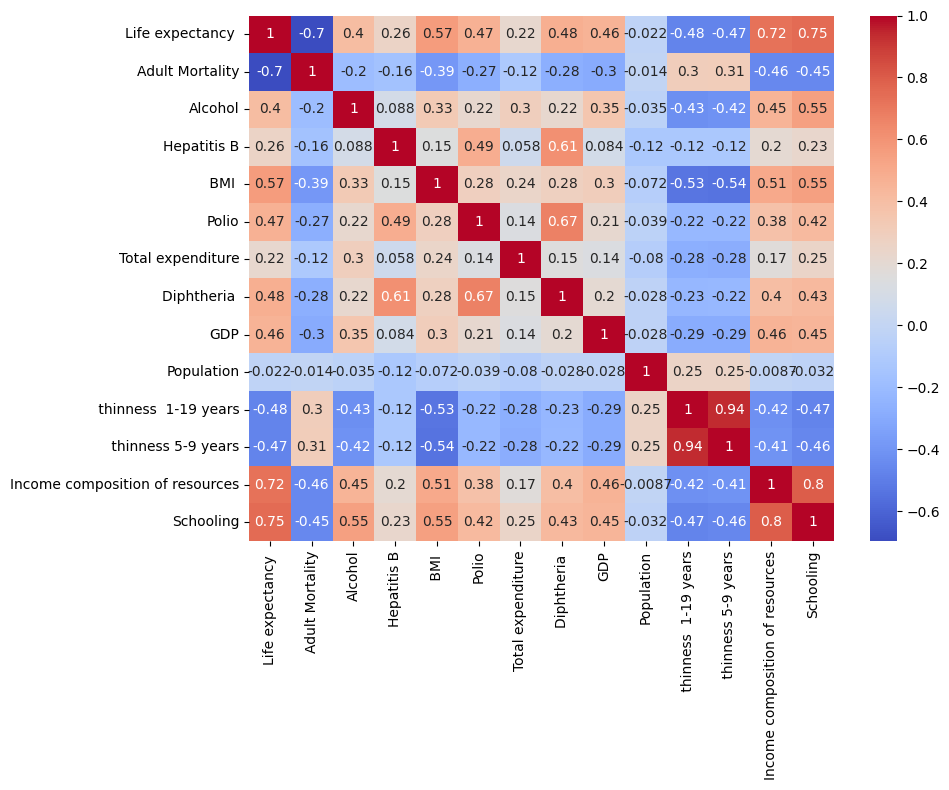

In [31]:
corr1 = df1[cols].corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr1, cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

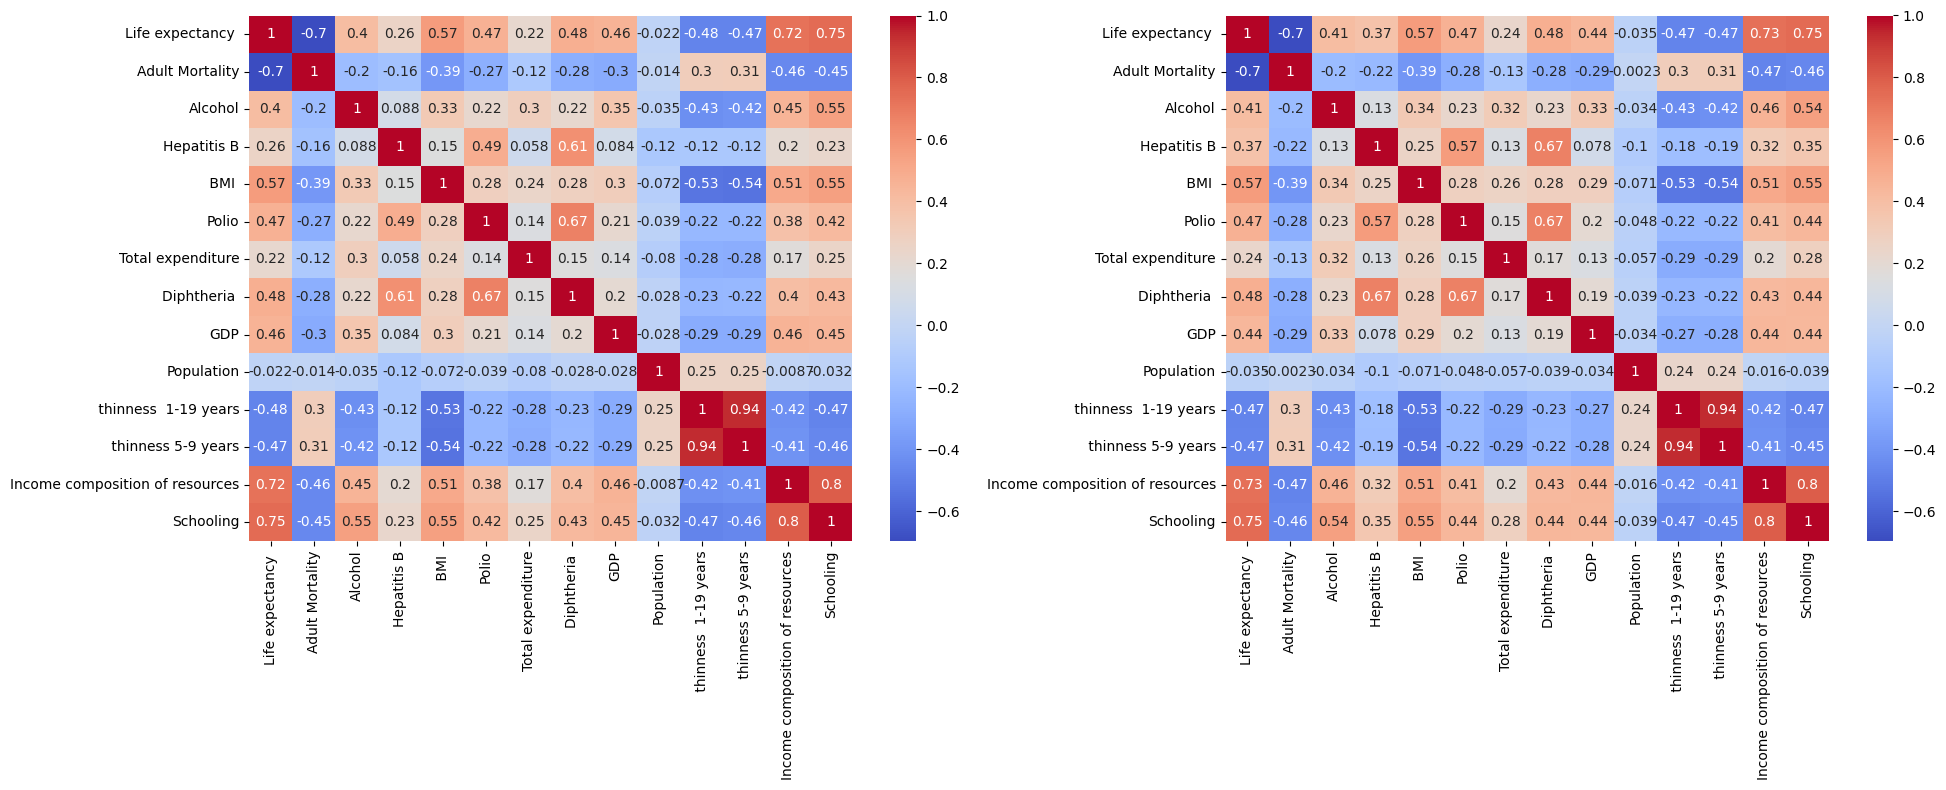

In [32]:
corr1 = df1[cols].corr()
corr2 = final_df[cols].corr()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.heatmap(corr1, cmap='coolwarm', annot=True, ax=ax[0])
sns.heatmap(corr2, cmap='coolwarm', annot=True, ax=ax[1])
plt.tight_layout()
plt.show()

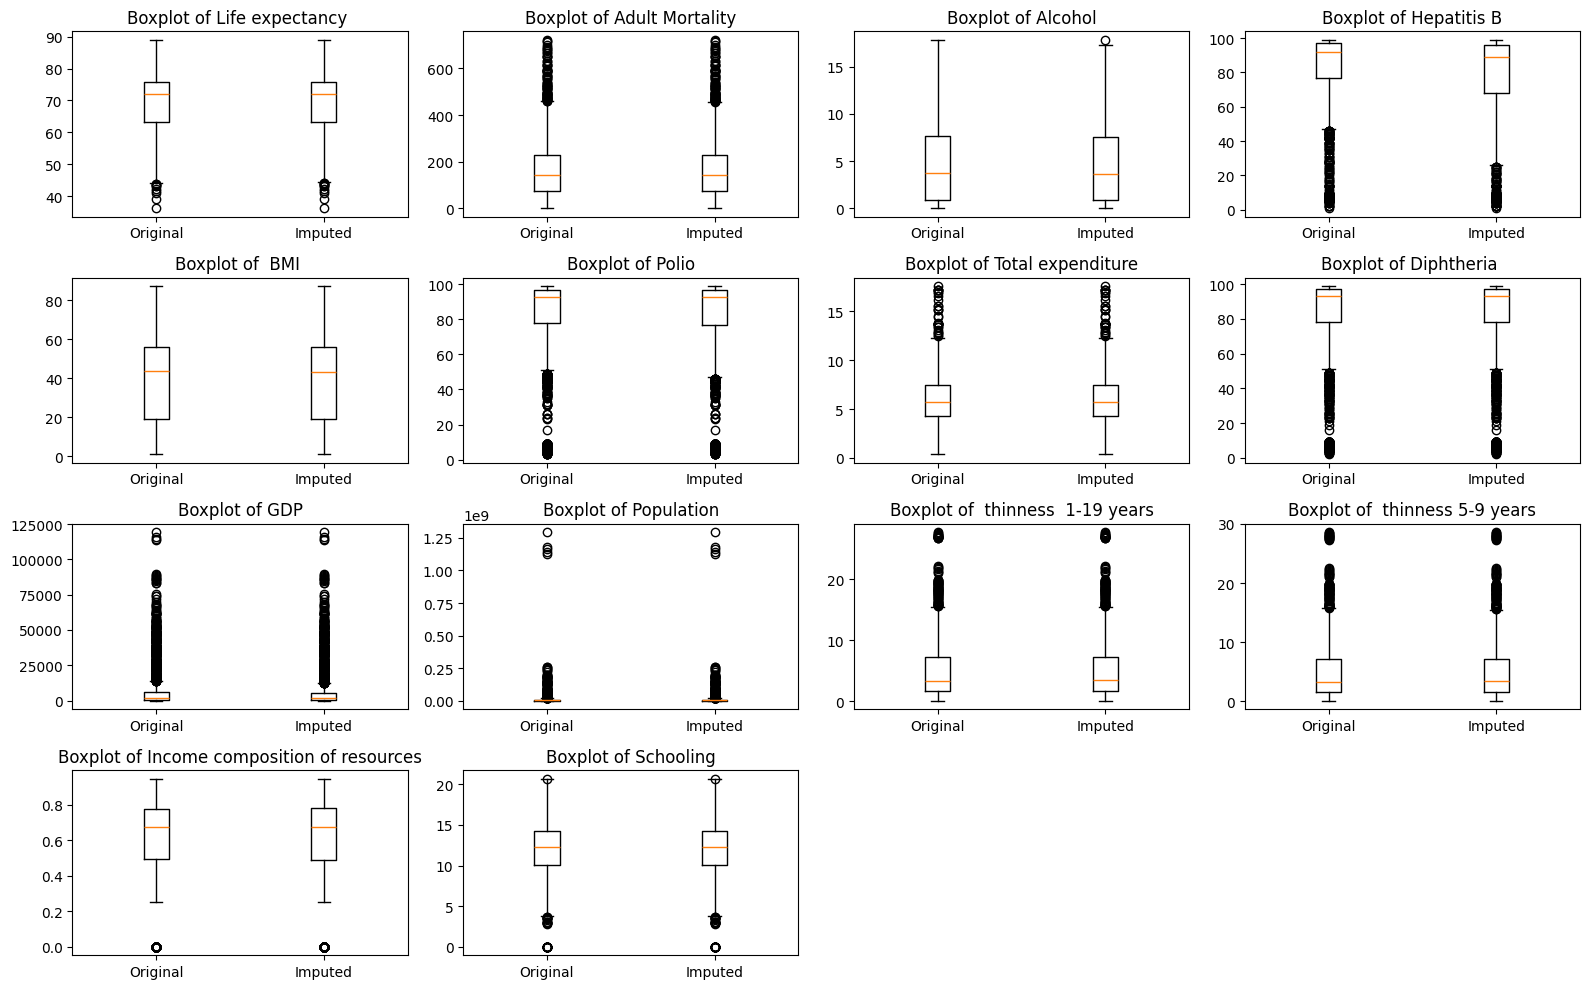

In [33]:
fig, ax = plt.subplots(4, 4, figsize=(16, 10))
ax = ax.flatten()  # Flatten to easily index subplots

for i, col in enumerate(cols):
    if i < len(ax):  # Ensure we don't exceed available subplots
        ax[i].boxplot([df1[col].dropna(), final_df[col]], tick_labels=["Original", "Imputed"])
        ax[i].set_title(f"Boxplot of {col}")

# Hide unused subplots (if cols has fewer than 16 features)
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

- Based on the above analysis, I'm confident that MICE imputation did well. I will continue with my analysis.

In [34]:
final_df[cols].skew()

Life expectancy                    -0.641348
Adult Mortality                     1.176477
Alcohol                             0.604600
Hepatitis B                        -1.508544
 BMI                               -0.197379
Polio                              -2.070211
Total expenditure                   0.628101
Diphtheria                         -2.056656
GDP                                 3.511815
Population                         17.332212
 thinness  1-19 years               1.708024
 thinness 5-9 years                 1.778947
Income composition of resources    -1.128536
Schooling                          -0.619125
dtype: float64

- Save the final df to csv in folder data/data_imputed

In [36]:
final_df.to_csv('/home/davidkibet/Desktop/Life Expectancy ML/data/data_imputed/final_df.csv')

In [37]:
# In first notebook
%store final_df


Stored 'final_df' (DataFrame)
